In [430]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def setup():
    yelp_df = pd.read_csv(
        "sentiment_labelled_sentences/yelp_labelled.txt", 
        "\t", 
        encoding='utf-8',
        header = None, 
        names = ["review", "score"]
    )
    amazon_df = pd.read_csv(
        "sentiment_labelled_sentences/amazon_cells_labelled.txt", 
        "\t", 
        header = None, 
        names = ["review", "score"]
    )
    imdb_df = pd.read_csv(
        "sentiment_labelled_sentences/imdb_labelled.txt", 
        "\t", 
        header = None,
        names = ["review", "score"]
    )
    
    yelp_df = yelp_df.dropna()
    amazon_df = amazon_df.dropna()
    imdb_df = imdb_df.dropna()

    yelp_df['src'] = pd.Series("yelp", index = yelp_df.index)
    amazon_df['src'] = pd.Series("amazon", index = amazon_df.index)
    imdb_df['src'] = pd.Series("imdb", index = imdb_df.index)
    
    data_df = pd.concat([yelp_df, amazon_df, imdb_df])
    
    return data_df
    
setup()


,review,score,src
0,Wow... Loved this place.,1,yelp
3,Crust is not good.,0,yelp
4,Not tasty and the texture was just nasty.,0,yelp
10,Stopped by during the late May bank holiday of...,1,yelp
11,The selection on the menu was great and so wer...,1,yelp
12,Now I am getting angry and I want my damn pho.,0,yelp
13,Honeslty it didn't taste THAT fresh.),0,yelp
16,The potatoes were like rubber and you could te...,0,yelp
18,The fries were great too.,1,yelp
19,A great touch.,1,yelp


In [431]:
def prt_a():
    data_df = setup()
    score = data_df["score"].value_counts()

    print("ratio of 0 to 1: {0}".format(score[0]/float(score[1])) )

prt_a()

ratio of 0 to 1: 0.982683982684


In [432]:
def clean_data(data_df):
    #Lower casing
    data_df["review"] = data_df["review"].str.lower()
    
    #Stripping Punctuation     
    data_df["review"] = data_df["review"].str.replace('[^\w\s]','')
    
    # Lemmatizing using NLTK stemmer
    stemmer = PorterStemmer()     
    new_arr=[]
    for review in data_df["review"]:
        new_sent=[]
        for word in review.split():
            try:
                if word not in stopwords.words("english"):
                    new_sent.append(stemmer.stem(word))
            except:
                pass
        new_arr.append(" ".join(new_sent))
    data_df["creview"]=np.array(new_arr)

def prt_b():
    data_df = setup()
    clean_data(data_df)
    print(data_df)

prt_b()

                                                review  score   src  \
0                                 wow loved this place      1  yelp   
3                                    crust is not good      0  yelp   
4             not tasty and the texture was just nasty      0  yelp   
10   stopped by during the late may bank holiday of...      1  yelp   
11   the selection on the menu was great and so wer...      1  yelp   
12       now i am getting angry and i want my damn pho      0  yelp   
13                  honeslty it didnt taste that fresh      0  yelp   
16   the potatoes were like rubber and you could te...      0  yelp   
18                            the fries were great too      1  yelp   
19                                       a great touch      1  yelp   
23                             service was very prompt      1  yelp   
24                                   would not go back      0  yelp   
26   the cashier had no care what so ever on what i...      0  yelp   
28   i

In [433]:
def test_train_split(data_df):
    amazon=data_df[data_df["src"]=="amazon"]
    yelp=data_df[data_df["src"]=="yelp"]
    imdb=data_df[data_df["src"]=="imdb"]
    
    amazon_neg=amazon[amazon["score"]==0]
    amazon_pos=amazon[amazon["score"]==1]
    imdb_neg=imdb[imdb["score"]==0]
    imdb_pos=imdb[imdb["score"]==1]
    yelp_neg=yelp[yelp["score"]==0]
    yelp_pos=yelp[yelp["score"]==1]
    
    training=pd.concat([
        amazon_neg.iloc[0:399],
        amazon_pos.iloc[0:399],
        yelp_pos.iloc[0:399],
        yelp_neg.iloc[0:399],
        imdb_pos.iloc[0:308],
        imdb_neg.iloc[0:288]
    ])
    testing=pd.concat([
        amazon_neg.iloc[400:499],
        amazon_pos.iloc[400:499],
        yelp_pos.iloc[400:499],
        yelp_neg.iloc[400:499],
        imdb_pos.iloc[309:386], #386
        imdb_neg.iloc[289:362]    
    ])
    
    return(training,testing)

def part_c():
    data_df = setup()
    clean_data(data_df)
    training,testing=test_train_split(data_df)
    print(training)
    
part_c()

                                                review  score     src  \
1    so there is no way for me to plug it in here i...      0  amazon   
10   tied to charger for conversations lasting more...      0  amazon   
13   i have to jiggle the plug to get it to line up...      0  amazon   
15   if you have several dozen or several hundred c...      0  amazon   
18                   needless to say i wasted my money      0  amazon   
21                      what a waste of money and time      0  amazon   
29   if the two were seperated by a mere 5 ft i sta...      0  amazon   
33   the design is very odd as the ear clip is not ...      0  amazon   
36                  i advise everyone do not be fooled      0  amazon   
41   it clicks into place in a way that makes you w...      0  amazon   
42   i went on motorolas website and followed all d...      0  amazon   
51             the commercials are the most misleading      0  amazon   
56   i bought it for my mother and she had a proble

In [434]:
DATA_DF = setup()
clean_data(DATA_DF)
TRAINING,TESTING = test_train_split(DATA_DF)

In [435]:
def bag_of_words(training):
    dict_s = pd.Series()
    for review in training["creview"]:
        for word in review.split():
            if word not in dict_s:
                dict_s[word] = 1
#             else:
#                 dict_s[word] += 1
    return dict_s

def counter(data_df, bag):
    for review in data_df["creview"]:
        for word in review.split():
            if word in bag:
                bag[word] += 1
    return bag.sort_values()

def featurenator(review, count_bag):
    vector = np.zeros(len(count_bag))
    for word in review.split():
        try:
            ind = count_bag.keys().get_loc(word)
            vector[ind] +=1
        except:
            print("Error in looking up: "+word)
    return vector

def part_d():
    data_df = DATA_DF
    training = TRAINING
    testing = TESTING
    bag = bag_of_words(training)
    count_bag = counter(data_df, bag)
    fvector1 = featurenator(data_df["creview"].iloc[0], count_bag)
    fvector2 = featurenator(data_df["creview"].iloc[20], count_bag)
    print(fvector1, fvector2)

part_d()

BAG = counter(DATA_DF, bag_of_words(TRAINING))

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))


In [436]:
from numpy import linalg as la

def standardize(feature):
    mean = np.mean(feature)
    var = np.var(feature)
    for i in (feature - mean)/var :
        if (i-1.00081855389) > 0.000001:
            print(i)
    
def el2(feature):
    normed=feature / la.norm(feature)
    return normed

def make_features(data_df,bag):
    features=[]
    for review in data_df["creview"].values:
        features.append(el2(featurenator(review,bag)))
    return features
    
def part_e():
    data_df = DATA_DF
    bag = BAG
    training=TRAINING
#     feature = featurenator(data_df["creview"].iloc[0], bag)
# #     standardize(feature)
#     el2(feature)
    make_features(training,bag)
#     print(u"cart" in bag)
part_e()  

In [437]:
FEATURES = make_features(TRAINING,BAG)
print(FEATURES)

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,

In [489]:
from numpy import linalg as la
def random_initial(feature_vectors):
    data_min=np.min(feature_vectors)
    data_max=np.max(feature_vectors)
    feature_len=len(feature_vectors[0])
    random_vec = np.random.uniform(data_min,data_max,feature_len)
    return random_vec

def setup_initials2(k,feature_vectors):
    random_indexes=np.random.choice(range(len(feature_vectors)),k,replace=False)
    return reconst_features(random_indexes,feature_vectors)
    
def setup_initials(k,feature_vectors):
    centroids=[]
    for i in range(k):
        centroids.append(random_initial(feature_vectors))
    return centroids

def k_means(k,feature_vectors):
    initials=setup_initials2(k,feature_vectors)
#   We need to have rev dic be empty(since we have no values to start in it) 
#   but yet not be empty (or else it will be seen as the groups not changing)
#   Therefore, introduce cheating element which keeps algorithm from stoping on the first iteration
    return k_mean_help(k,feature_vectors,initials,{"CHEAT":"CHEAT"})
    
def k_mean_help(k,feature_vectors,centroids,old_rev_dic):
    label_dic={}
    rev_dic={}
    for i in range(len(feature_vectors)):
        assign_closest(i,feature_vectors[i],centroids,label_dic,rev_dic)
    
#     print("centroids: "+str(centroids))
    
    if rev_dic==old_rev_dic:
#         return (label_dic,rev_dic,centroids)
        return(rev_dic,centroids)
    
    new_centroids=recalc_centroids(feature_vectors,rev_dic)
#     print("new_centroids: "+str(new_centroids))
    return k_mean_help(k,feature_vectors,new_centroids,rev_dic)
#     print(label_dic)
#     print(rev_dic)

def assign_closest(vector_alias,feature_vector,centroids,label_dic,rev_dic):
    dists=[]
    for centroid in centroids:
        dists.append(la.norm(feature_vector-centroid))
    
    #Vector -> Which centroid its assigned to
    which_centroid=np.argmin(dists)
    label_dic[vector_alias]=which_centroid
    
    #Which centroid -> list of vectors
    if which_centroid in rev_dic:
        rev_dic[which_centroid].append(vector_alias)
    else:
        rev_dic[which_centroid]=[vector_alias]
        
#For some Idea we thought it would be a good idea to do a transform on both our centroids and feature vectors.
#instead of moving around real centroids and vectors, we move around indicies to them and transform back.
def reconst_features(feat_indexes,feature_vectors):
    features=[]
    for el in feat_indexes:
        features.append(feature_vectors[el])
    return np.array(features)

#given a list of feature vector indicies, get the review associated with them.
def reconst_reviews(rev_dic,source):
    review_dic={}
    for key in rev_dic:
        index_list=rev_dic[key]
        review_list=[]
        for index in index_list:
            review_list.append(source["review"].values[index])
        review_dic[key]=review_list
    return review_dic    
        
def recalc_centroids(feature_vectors,rev_dic):
    new_centroids=[]
#     print("keys: "+str(rev_dic.keys()))
    for key in rev_dic.keys():
        group_features=reconst_features(rev_dic[key],feature_vectors)
        new_centroids.append(np.mean(group_features, axis=0))
    return new_centroids
        
def part_f():
    feature_vectors=FEATURES
#     print(np.max(feature_vectors), np.min(feature_vectors))
#     k_means(2,feature_vectors)
    fake_features=np.array([[1,1],[1,3],[3,5],[4,5],[5,4]])
    fake_features2=np.array([[1,1],[1,5],[3,4],[3,7],[1,9],[4,6]])#,[8,3],[8,5],[9,3],[9,5]])
    fake_centroids=np.array([[1,2],[5,5]])
    
#     print(k_means(2,feature_vectors)[1])
    
#     k_mean_help(2,fake_features,fake_centroids)

part_f()

0.503663003663
[3665, 3649, 3629]
great
love
excel


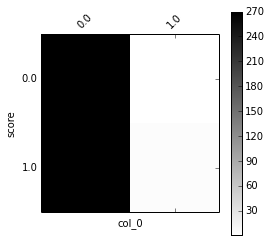

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
def confusion(actu, pred):
    df_confusion = pd.crosstab(actu, pred)
    plot_confusion_matrix(df_confusion)

# http://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

def part_g():
    data_df = DATA_DF
    training = TRAINING
    testing = TESTING
    feature_vectors=FEATURES
    bag = BAG
    
    lr = LogisticRegression()
    lr.fit(feature_vectors, training["score"])
    
    test_features=gram_make_features(testing,bag)

    
    predicted = lr.predict(test_features)
    print (metrics.accuracy_score(testing["score"], predicted))
    confusion(testing["score"], predicted)
    
    sorted_ind = np.argsort(lr.coef_)[0] 
    highest= [sorted_ind[-1], sorted_ind[-2], sorted_ind[-3]] 
    print highest
    for index in highest:
        print(bag.keys()[index])
#     print(bag)
    
part_g()

KMEANS
({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 1, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 

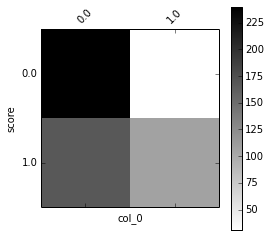

In [440]:
def bag_of_ngrams(training):
    dict_s = pd.Series()
    for review in training["creview"]:
        n_grams=n_gramize(2,review)
        for n_gram in n_grams:
            if n_gram not in dict_s:
                dict_s[n_gram] = 1
    return dict_s

def counter_ngrams(data_df, bag):
    for review in data_df["creview"]:
        n_grams=n_gramize(2,review)
        for n_gram in n_grams: 
            if n_gram in bag:
                bag[n_gram] += 1
    return bag.sort_values()

def gram_featurenator(review, count_bag):
    vector = np.zeros(len(count_bag))
    n_grams=n_gramize(2,review)
    for n_gram in n_grams:
        try:
            ind = count_bag.keys().get_loc(n_gram)
            vector[ind] +=1
        except:
            pass
#             print("Error in looking up: "+review)
    return vector

def check_nans(feature):
    if np.any(np.isnan(feature)):
        return np.zeros(len(feature))
    else:
        return feature
    
def gram_make_features(data_df,bag):
    features=[]
    for review in data_df["creview"].values:
        checked_features=check_nans(el2(gram_featurenator(review,bag)))
#         print(checked_features)
        features.append(checked_features)
    return features

def n_gramize(n,review):
    n_grams=[]
    words=review.split()
    for i in range(len(words)):
        if i+n<=len(words):
            n_grams.append(" ".join(words[i:i+n]))
    #Special case for one word reviews
    if n_grams==[]:
        return [review]
    return n_grams
# print (n_gramize(2,"bob fell off of the boat"))
def part_h():
    print("KMEANS")
    training=TRAINING
    testing=TESTING
    data_df = DATA_DF
    ngram_bag=bag_of_ngrams(training)
    ngram_count_bag=counter_ngrams(data_df,ngram_bag)
    ngram_features=gram_make_features(training,ngram_count_bag)
    print(k_means(2,ngram_features))
    
    print("LOGIT")
    lr = LogisticRegression()
    lr.fit(ngram_features, training["score"])
    
    ngram_test_features=gram_make_features(testing,ngram_count_bag)
    
    predicted = lr.predict(ngram_test_features)
    print (metrics.accuracy_score(testing["score"], predicted))
    confusion(testing["score"], predicted)
    
    sorted_ind = np.argsort(lr.coef_)[0] 
    highest= [sorted_ind[-1], sorted_ind[-2], sorted_ind[-3]] 
    print highest
    for index in highest:
        print(ngram_count_bag.keys()[index])
    
#     sample_feature=gram_featurenator(training["creview"].values[4],ngram_count_bag)
part_h()


In [475]:
from numpy import linalg as la
#so it seems like there are two ways of thinking about pca, either using eigenvectors of XXT or svd(X)
#Presumably svd() takes care of non-squre matrices somehow. Sources suggest using svd is more reliable
def the_pca(features,n):
#     Center- Not quite sure what diff is between average and mean in this context, but I think we want the mean.
    the_avg = np.mean(features, axis=0)
    features -= the_avg
#     square_features=np.dot(features,np.transpose(features))
#     SVD meat
    U, S, V = la.svd(features, full_matrices=False)
#     Slice and dice
    U = U[:, :n]
    U *= S[:n]
    return U
features = np.array(FEATURES)  
PCA2_FEATURES=the_pca(features,2)
PCA10_FEATURES=the_pca(features,10)
PCA50_FEATURES=the_pca(features,50)
PCA100_FEATURES=the_pca(features,100)

In [501]:
def norm_all_the_things(features):
    normed=[]
    for feature in features:
        normed.append(el2(feature))
    return normed
        
# If you want the reviews back, simply:
# dic=k_means(2,pca10_norm)[0]
print (reconst_reviews(dic,TRAINING))

pca2_norm=norm_all_the_things(PCA2_FEATURES)
pca10_norm=norm_all_the_things(PCA10_FEATURES)
pca50_norm=norm_all_the_things(PCA50_FEATURES)
pca100_norm=norm_all_the_things(PCA100_FEATURES)

print("2:")
print(k_means(2,pca2_norm))
print("10:")
print(k_means(2,pca10_norm))
print("50:")
print(k_means(2,pca50_norm))
print("100:")
print(k_means(2,pca100_norm))

Error in looking up: v265
Error in looking up: intermitt
Error in looking up: reach
Error in looking up: be3
Error in looking up: nightmar
Error in looking up: speakerphon
Error in looking up: cassett
Error in looking up: sensor
Error in looking up: reliabl
Error in looking up: beep
Error in looking up: counterfeit
Error in looking up: 8125
Error in looking up: bottowm
Error in looking up: lineanoth
Error in looking up: gimmick
Error in looking up: broken
Error in looking up: discomfort
Error in looking up: trust
Error in looking up: wrongfirst
Error in looking up: holder
Error in looking up: beep
Error in looking up: beep
Error in looking up: beep
Error in looking up: unintellig
Error in looking up: restart
Error in looking up: bend
Error in looking up: leaf
Error in looking up: metal
Error in looking up: stress
Error in looking up: saggi
Error in looking up: floppi
Error in looking up: abovepretti
Error in looking up: soundwis
Error in looking up: snap
Error in looking up: 8525
Error

LinAlgError: SVD did not converge